PROJET DATA MINING 
realisée par Cyrine FakhFakh et Yosser Ghrairi

Objectif :
Identifier les facteurs qui influent sur la satisfaction des employés et  Identifier les tendances de rémunération et de performance des employés pour évaluer l'équité salariale et proposer des ajustements si nécessaire.proposer des recommandations pour améliorer leur rétention.

In [2]:
#importation des bibliotheques necessaires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# Charger les données depuis un fichier CSV
!pip install xlrd>=2.0.1
sheet = pd.read_excel(r"C:\Users\Maja\Desktop\datam\Employee Sample Data.xlsx")

In [4]:
df=pd.DataFrame(sheet)

In [7]:
# Afficher les premières lignes de données pour comprendre la structure
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [13]:
#afficher les 10 derniers lignes
df.tail(10)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
990,E01578,Anthony Hong,Sr. Manger,IT,Research & Development,Male,Asian,37,2010-11-29,146961,0.11,United States,Columbus,NaT
991,E03430,Leo Herrera,Sr. Business Partner,Human Resources,Research & Development,Male,Latino,48,1998-04-22,85369,0.00,Brazil,Manaus,2004-11-27
992,E03058,Robert Wright,Technical Architect,IT,Manufacturing,Male,Caucasian,30,2015-06-14,67489,0.00,United States,Chicago,NaT
993,E04762,Audrey Richardson,Director,IT,Manufacturing,Female,Caucasian,46,2018-10-06,166259,0.17,United States,Chicago,NaT
994,E01148,Scarlett Kumar,Systems Analyst,IT,Corporate,Female,Asian,55,2009-01-07,47032,0.00,United States,Columbus,NaT
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,NaT
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,NaT
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,2012-01-28,95960,0.00,China,Chengdu,NaT
999,E03545,Sofia Cheng,Vice President,Accounting,Corporate,Female,Asian,63,2020-07-26,216195,0.31,United States,Miami,NaT


In [14]:
df.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date
count,1000.000000,1000,1000.000000,1000.000000,85
mean,44.382000,2012-04-07 02:54:14.400000,113217.365000,0.088660,2016-11-02 18:04:14.117647104
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000,1994-12-18 00:00:00
25%,35.000000,2007-02-14 00:00:00,71430.250000,0.000000,2014-12-25 00:00:00
50%,45.000000,2014-02-15 12:00:00,96557.000000,0.000000,2019-05-23 00:00:00
75%,54.000000,2018-06-22 00:00:00,150782.250000,0.150000,2021-04-09 00:00:00
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000,2022-08-17 00:00:00
std,11.246981,NaN,53545.985644,0.117856,NaN


In [15]:
df.shape

(1000, 14)

In [16]:
print(df.dtypes)

EEID                     object
Full Name                object
Job Title                object
Department               object
Business Unit            object
Gender                   object
Ethnicity                object
Age                       int64
Hire Date        datetime64[ns]
Annual Salary             int64
Bonus %                 float64
Country                  object
City                     object
Exit Date        datetime64[ns]
dtype: object


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

In [18]:
# Compter les occurrences de chaque catégorie dans la colonne 'Gender'
df['Gender'].value_counts()

Gender
Female    518
Male      482
Name: count, dtype: int64

In [19]:
# Compter les occurrences de chaque valeur unique dans la colonne "Ethnicity"
ethnicity_counts = df['Ethnicity'].value_counts()

In [20]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [21]:
#supprimer les lignes en double
df.drop_duplicates(inplace = True)

In [22]:
df.shape

(1000, 14)

In [23]:
#Afficher le min et le max de conso
print('max : ' + str(df['Annual Salary'].max()))
print('min : ' + str(df['Annual Salary'].min()))

max : 258498
min : 40063


In [24]:
#Supprimer Une Colonne
df=df.drop(columns='EEID')
df.head()

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [ ]:
#Supprimer Une Colonne
df=df.drop(columns='Exit Date')
df.head()

In [25]:
df['Annual Salary'].mean()

113217.365

In [26]:
df['Annual Salary'].median()

96557.0

In [27]:
df['Annual Salary'].min()

40063

In [28]:
df['Annual Salary'].max()

258498

In [29]:
df.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date
count,1000.000000,1000,1000.000000,1000.000000,85
mean,44.382000,2012-04-07 02:54:14.400000,113217.365000,0.088660,2016-11-02 18:04:14.117647104
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000,1994-12-18 00:00:00
25%,35.000000,2007-02-14 00:00:00,71430.250000,0.000000,2014-12-25 00:00:00
50%,45.000000,2014-02-15 12:00:00,96557.000000,0.000000,2019-05-23 00:00:00
75%,54.000000,2018-06-22 00:00:00,150782.250000,0.150000,2021-04-09 00:00:00
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000,2022-08-17 00:00:00
std,11.246981,NaN,53545.985644,0.117856,NaN


In [6]:
# Convertir les variables catégorielles en variables factices
data_encoded = pd.get_dummies(sheet, columns=['Job Title', 'Department', 'Business Unit', 'Gender', 'Ethnicity', 'Country', 'City'])


In [9]:
data_encoded.head()

,EEID,Full Name,Age,Hire Date,Annual Salary,Bonus %,Exit Date,Job Title_Account Representative,Job Title_Analyst,Job Title_Analyst II,...,City_Chicago,City_Chongqing,City_Columbus,City_Manaus,City_Miami,City_Phoenix,City_Rio de Janerio,City_Sao Paulo,City_Seattle,City_Shanghai
0,E02387,Emily Davis,55,2016-04-08,141604,0.15,2021-10-16,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,E04105,Theodore Dinh,59,1997-11-29,99975,0.00,NaT,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,E02572,Luna Sanders,50,2006-10-26,163099,0.20,NaT,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,E02832,Penelope Jordan,26,2019-09-27,84913,0.07,NaT,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,E01639,Austin Vo,55,1995-11-20,95409,0.00,NaT,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
# Compter le nombre d'employés par département
department_counts = df['Department'].value_counts()
print("Nombre d'employés par département :")
print(department_counts)

Nombre d'employés par département :
Department
IT                 241
Engineering        158
Sales              140
Human Resources    125
Finance            120
Marketing          120
Accounting          96
Name: count, dtype: int64


C:\Users\Maja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


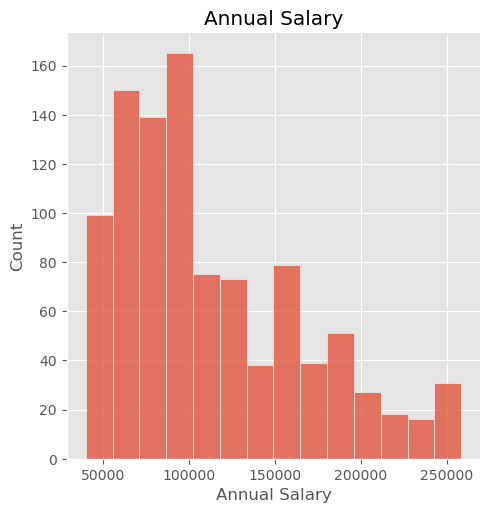

In [12]:
sns.displot(df["Annual Salary"],  kde = False)
plt.title("Annual Salary");

D’après l’histogramme, on peut faire les observations suivantes :

La tranche de salaire la plus courante semble être entre 50 000 et100000, comme indiqué par les barres les plus hautes.
À mesure que le salaire augmente au-delà de 100 000 $, moins d’individus se situent dans ces tranches de revenus plus élevées.

Cela signifie que dans cette population, la majorité des individus gagnent un salaire annuel entre 50 000 et100000.
trés peu de personnes gagnent un salaire supérieur à 100 000 $ par an.

C:\Users\Maja\AppData\Local\Temp\ipykernel_7040\3074389283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Maja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


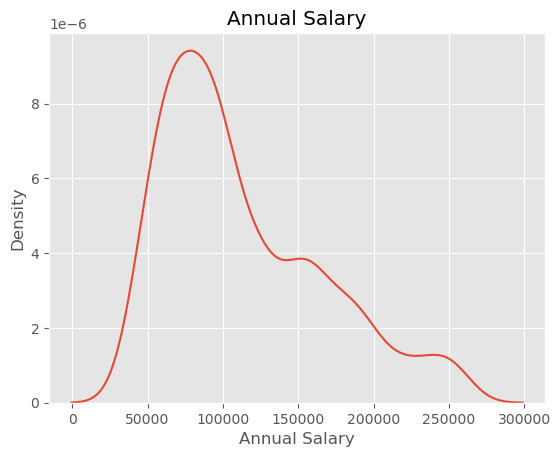

In [13]:
sns.distplot(
    df["Annual Salary"], 
    kde = True, 
    hist = False).set_title("Annual Salary");

C:\Users\Maja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

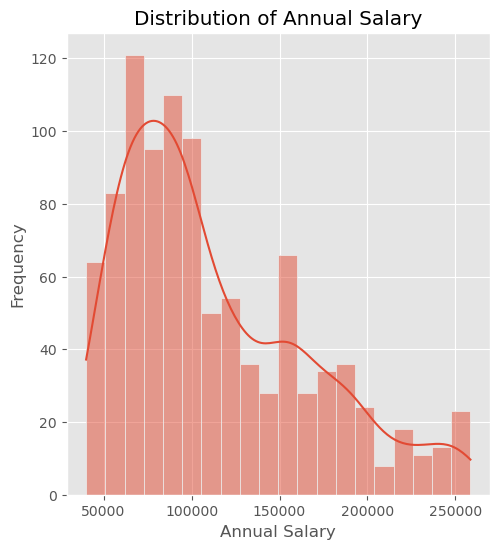

In [16]:
#Histograms for 'Annual Salary' and 'Bonus'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Salary'], kde=True, bins=20)
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')

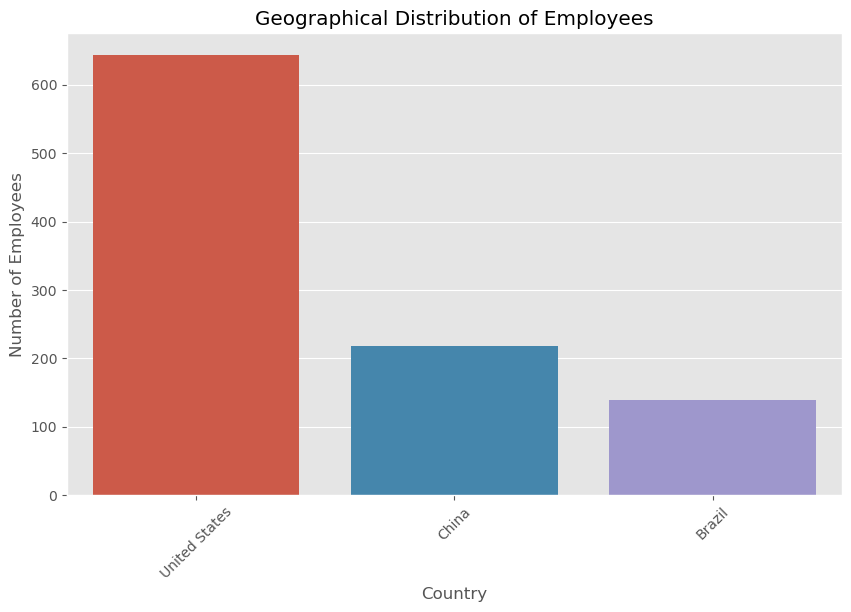

In [50]:
# Geographical distribution of employees
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df)
plt.title('Geographical Distribution of Employees')
plt.xlabel('Country')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

D’après le graphique à barres, voici quelques déductions que nous pouvons faire :

-Plus d’employés aux États-Unis : Les États-Unis ont le plus grand nombre      d’employés parmi les trois pays représentés. Cela pourrait indiquer que       l’entreprise ou l’industrie représentée dans le graphique a une présence      significative aux États-Unis.

-Moins d’employés en Chine et au Brésil : La Chine et le Brésil ont moins      d’employés que les États-Unis. Cela pourrait suggérer que l’entreprise ou     l’industrie a une présence plus petite ou plus récente dans ces pays.

-Expansion potentielle en Chine et au Brésil : Étant donné que la Chine et le  Brésil ont moins d’employés, il pourrait y avoir un potentiel pour une        expansion future dans ces marchés.

Text(0, 0.5, 'Count')

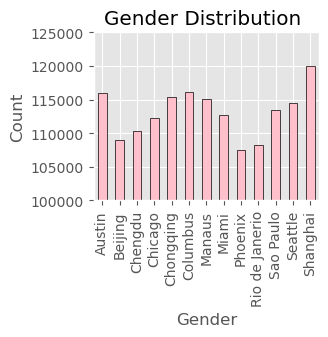

In [62]:
# Calculer la moyenne du salaire annuel par genre
city = df.groupby('City')['Annual Salary'].mean()
# Tracer le graphique à barres pour la distribution du salaire annuel par genre
plt.subplot(2, 2, 2)
city.plot(kind='bar', color=['pink'],edgecolor='black',ylim=(100000,125000))
plt.title('city Distribution ')
plt.xlabel('city')
plt.ylabel('Salary')

D’après le graphique, on peut faire les observations suivantes :

Shanghai : Shanghai a le salaire annuel moyen le plus élevé parmi toutes les villes représentées. Cela pourrait indiquer que Shanghai a le niveau de rémunération le plus élevé pour la métrique mesurée.

phoenix : phoenix a le salaire annuel moyen le plus bas. Cela pourrait indiquer que Manaus a le niveau de rémunération le plus bas pour la métrique mesurée.

Text(0, 0.5, 'Frequency')

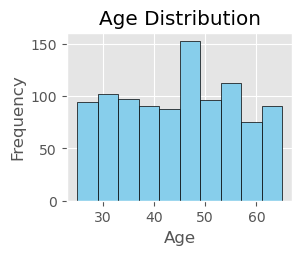

In [33]:
age_distribution = df['Age']
plt.subplot(2, 2, 1)
plt.hist(age_distribution, bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

D’après le graphique, on peut faire les observations suivantes :

Groupe d’âge 50-60 ans : Le groupe d’âge de 50 à 60 ans a la fréquence la plus élevée parmi tous les groupes d’âge représentés. Cela pourrait indiquer que le groupe d’âge de 50 à 60 ans est le plus courant dans cet échantillon.

Text(0, 0.5, 'Count')

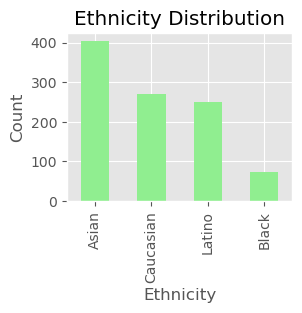

In [34]:
# Compter le nombre d'occurrences de chaque valeur ethnique
ethnicity_counts = df['Ethnicity'].value_counts()
# Tracer le graphique à barres pour la distribution ethnique
plt.subplot(2, 2, 3)
ethnicity_counts.plot(kind='bar', color='lightgreen')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

D’après le graphique, on peut faire les observations suivantes :

Asiatique : Le groupe ethnique asiatique a un certain décompte, représenté par la hauteur de la barre correspondante.

Caucasien : Le groupe ethnique caucasien a un décompte plus élevé que le groupe asiatique, comme indiqué par la hauteur de la barre.

Latino : Le groupe ethnique latino a un décompte inférieur à celui du groupe caucasien, mais supérieur à celui du groupe asiatique.

Noir : Le groupe ethnique noir a le décompte le plus élevé parmi tous les groupes ethniques représentés.

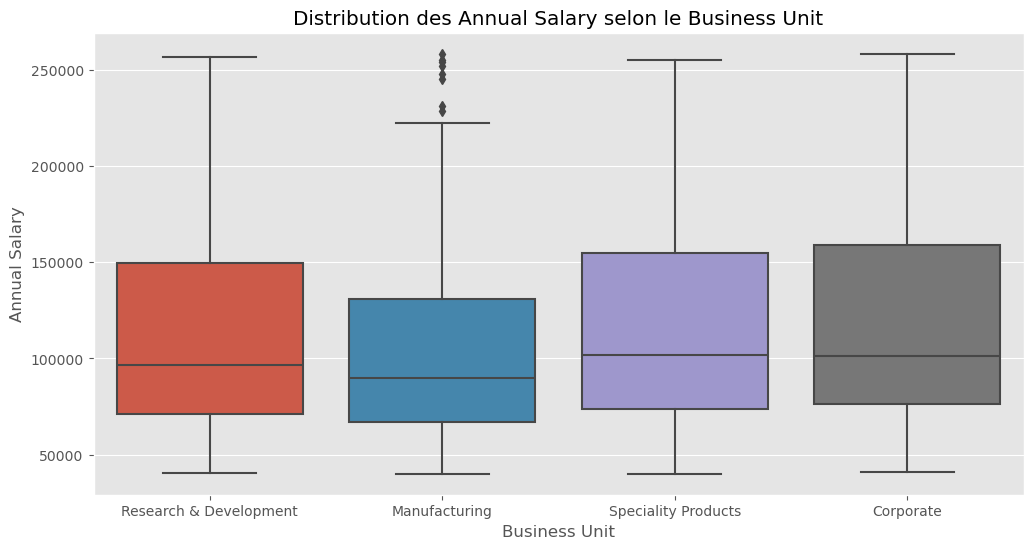

In [81]:
# Tracer le graphique de boîte à moustaches avec le genre comme variable qualitative
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Business Unit'], y=df['Annual Salary'], data=df, showfliers=True)
plt.xlabel('Business Unit')
plt.ylabel('Annual Salary')
plt.title('Distribution des Annual Salary selon le Business Unit')
plt.show()

D’après le graphique, on peut faire les observations suivantes :

Recherche & Développement : L’unité commerciale de Recherche & Développement a une certaine plage de salaires, représentée par la hauteur de la boîte et les moustaches.

Fabrication : L’unité commerciale de Fabrication a une plage de salaires différente, comme indiqué par la hauteur de la boîte et les moustaches.

Produits Spécialisés : L’unité commerciale de Produits Spécialisés a une autre plage de salaires.

Corporate : L’unité commerciale Corporate a une plage de salaires différente.

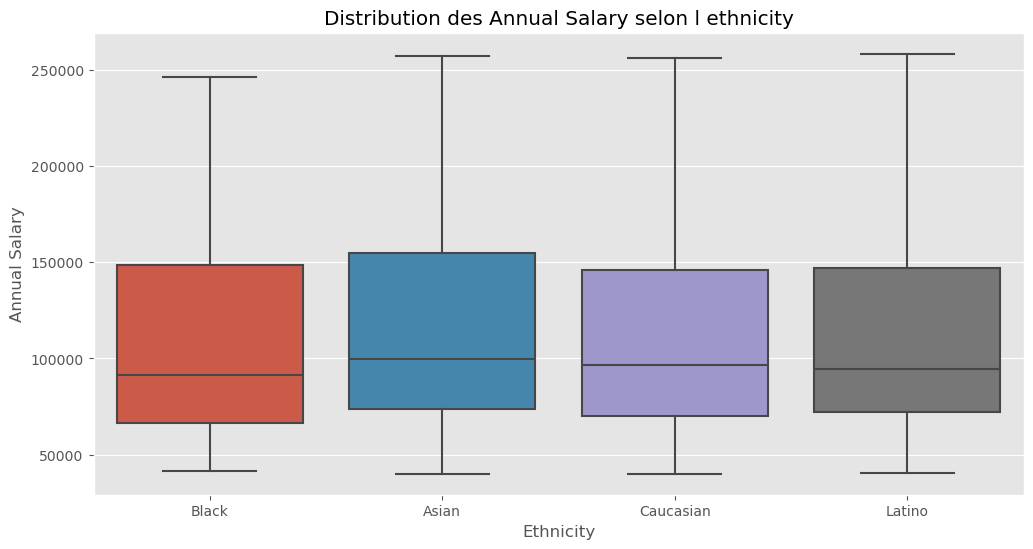

In [82]:
# Tracer le graphique de boîte à moustaches avec l Ethnicity comme variable qualitative
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Ethnicity'], y=df['Annual Salary'], data=df, showfliers=True)
plt.xlabel('Ethnicity')
plt.ylabel('Annual Salary')
plt.title('Distribution des Annual Salary selon l ethnicity')
plt.show()

D’après le graphique à boîtes, voici quelques déductions que nous pouvons faire :

Différences de salaire entre les groupes ethniques : Il semble y avoir des différences dans la distribution des salaires entre les différents groupes ethniques. Cela pourrait indiquer une disparité salariale entre ces groupes.

Salaire médian : Le salaire médian varie également entre les groupes ethniques. Par exemple, le groupe ethnique caucasien semble avoir un salaire médian plus élevé que les autres groupes.

Étendue des salaires : L’étendue des salaires (la différence entre le salaire le plus élevé et le plus bas) varie également entre les groupes ethniques. Certains groupes peuvent avoir une plus grande variété de salaires que d’autres.

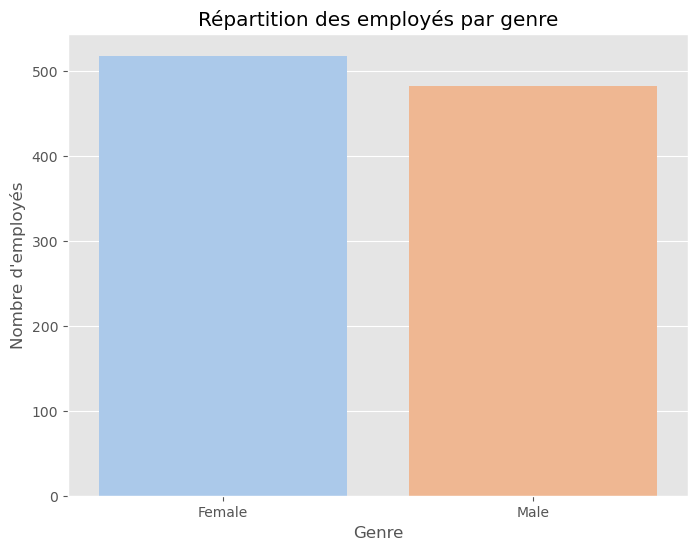

In [89]:
# Visualisation de la répartition des employés par genre
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Répartition des employés par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre d\'employés')
plt.show()

C:\Users\Maja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


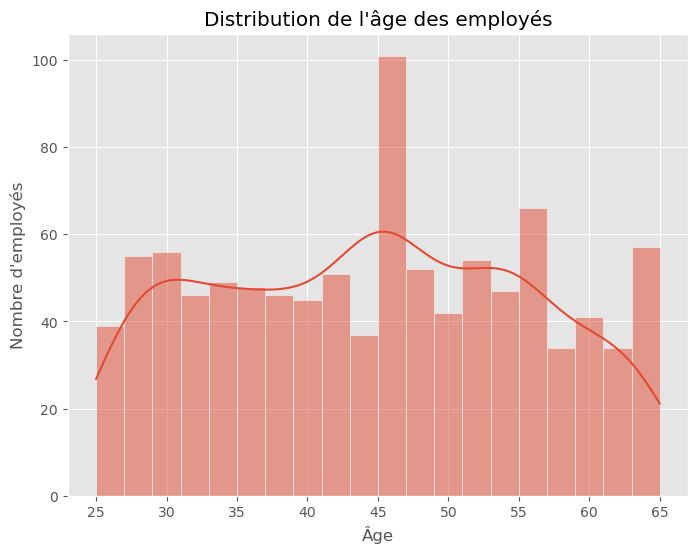

In [90]:
# Visualisation de la distribution de l'âge des employés
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de l\'âge des employés')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'employés')
plt.show()

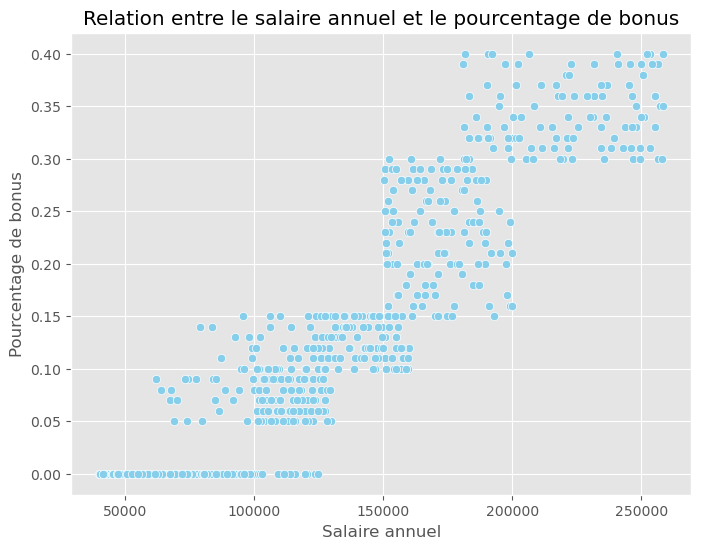

In [53]:
# Analyse de la relation entre le salaire et la performance (bonus %)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Salary', y='Bonus %', data=df, color='skyblue')
plt.title('Relation entre le salaire annuel et le pourcentage de bonus')
plt.xlabel('Salaire annuel')
plt.ylabel('Pourcentage de bonus')
plt.show()

D’après le graphique, on peut faire les observations suivantes :

Il semble y avoir une tendance où le pourcentage de bonus augmente avec l’augmentation du salaire annuel.

Il y a une concentration notable de données indiquant que les personnes ayant un salaire annuel d’environ 150 000 $ reçoivent un pourcentage de bonus d’environ 0,15 à 0,25.

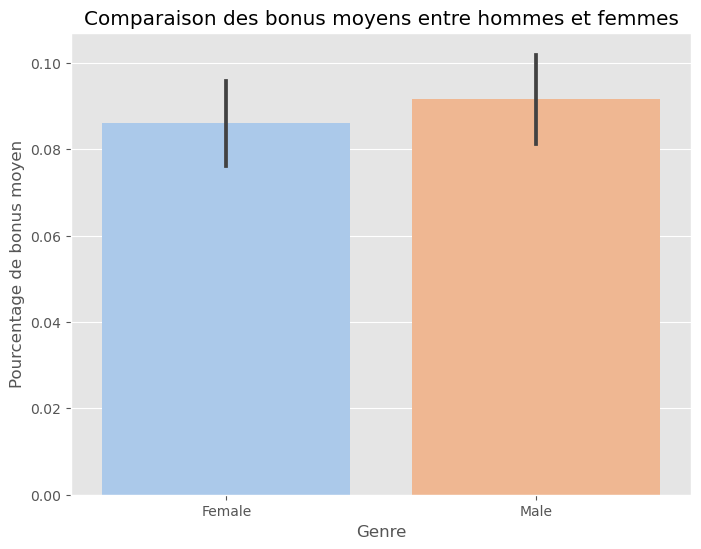

In [57]:
# Comparaison des bonus moyens entre hommes et femmes
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Bonus %', data=df, estimator='mean', palette='pastel')
plt.title('Comparaison des bonus moyens entre hommes et femmes')
plt.xlabel('Genre')
plt.ylabel('Pourcentage de bonus moyen')
plt.show()

D’après le graphique, on peut faire les déductions suivantes :

Bonus moyens plus élevés pour les hommes : Si nous supposons que les données sont correctes et représentatives, les hommes dans cet échantillon reçoivent en moyenne un pourcentage de bonus légèrement plus élevé que les femmes.

Variabilité des bonus : Les lignes d’erreur indiquent la variabilité des bonus au sein de chaque groupe de genre. Il semble y avoir une variabilité considérable dans les bonus tant pour les hommes que pour les femmes.

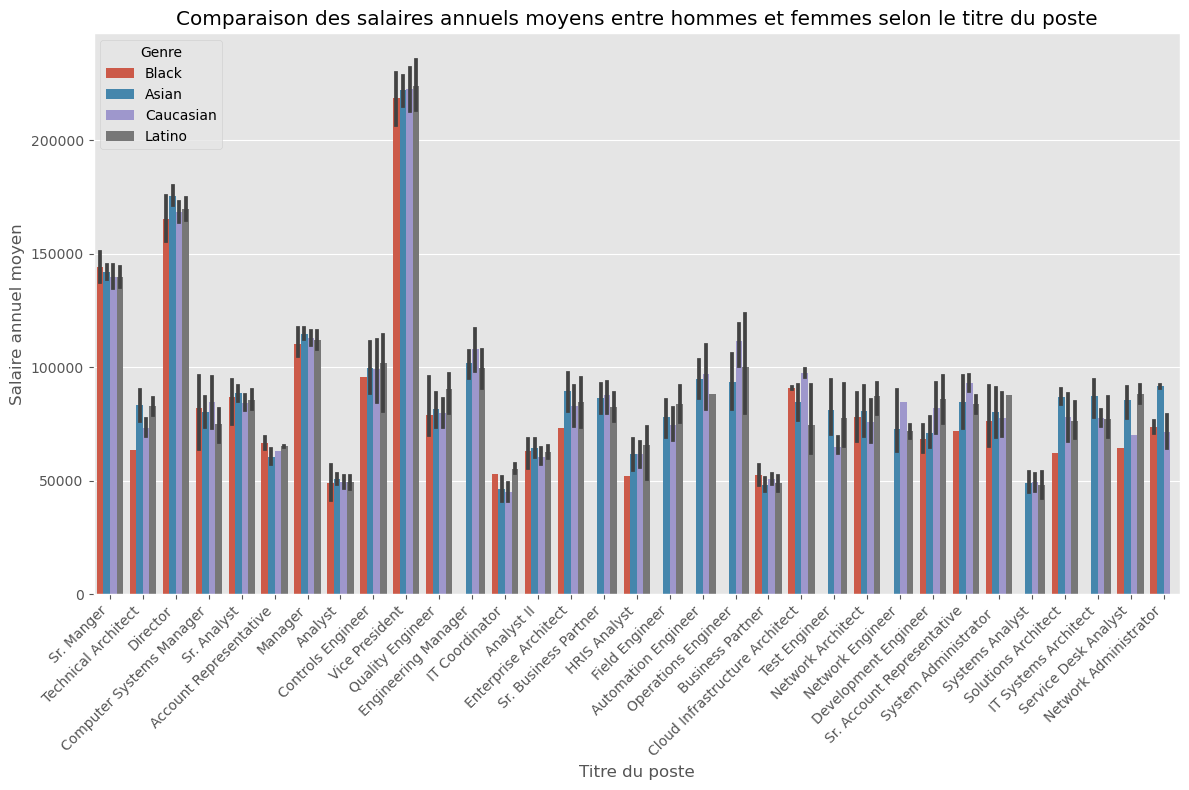

In [72]:
# Comparaison des salaires moyens entre hommes et femmes selon le titre du poste
plt.figure(figsize=(12, 8))
sns.barplot(x='Job Title', y='Annual Salary', hue='Ethnicity', data=df, estimator='mean')
plt.title('Comparaison des salaires annuels moyens entre hommes et femmes selon le titre du poste')
plt.xlabel('Titre du poste')
plt.ylabel('Salaire annuel moyen')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

D’après le graphique, on peut faire les déductions suivantes :

Différences de salaire entre les races/ethnicités : Il semble y avoir des différences dans les salaires annuels moyens entre les différentes races/ethnicités pour les différents titres de postes. Cela pourrait indiquer une disparité salariale entre ces groupes.

Variabilité des salaires : Les salaires varient également en fonction du titre du poste. Certains postes ont des salaires moyens plus élevés que d’autres, indépendamment de la race/ethnicité.

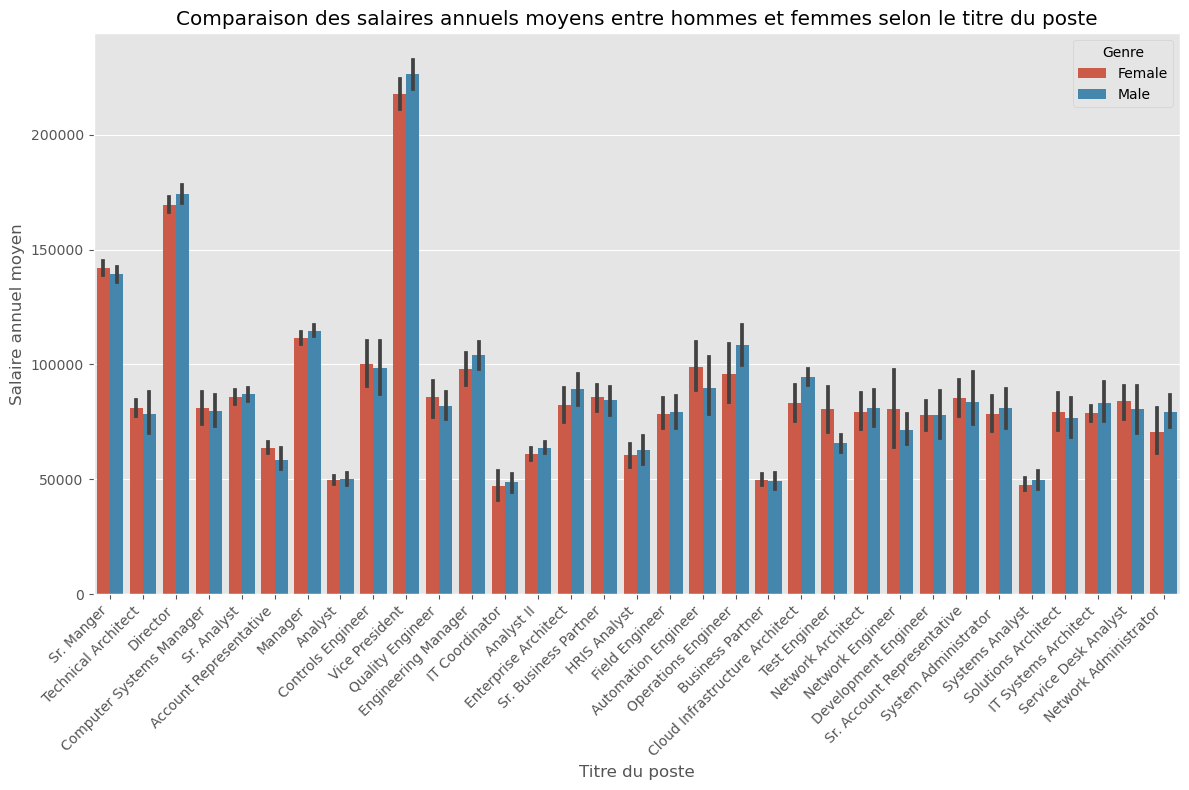

In [73]:
# Comparaison des salaires moyens entre hommes et femmes selon le titre du poste
plt.figure(figsize=(12, 8))
sns.barplot(x='Job Title', y='Annual Salary', hue='Gender', data=df, estimator='mean')
plt.title('Comparaison des salaires annuels moyens entre hommes et femmes selon le titre du poste')
plt.xlabel('Titre du poste')
plt.ylabel('Salaire annuel moyen')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

D’après le graphique, on peut faire les déductions suivantes :

Différences de salaire entre les genres : Il semble y avoir des différences dans les salaires annuels moyens entre les hommes et les femmes pour les différents titres de postes. Cela pourrait indiquer une disparité salariale entre les genres dans ces postes.

Variabilité des salaires : Les salaires varient également en fonction du titre du poste. Certains postes ont des salaires moyens plus élevés que d’autres, indépendamment du genre.

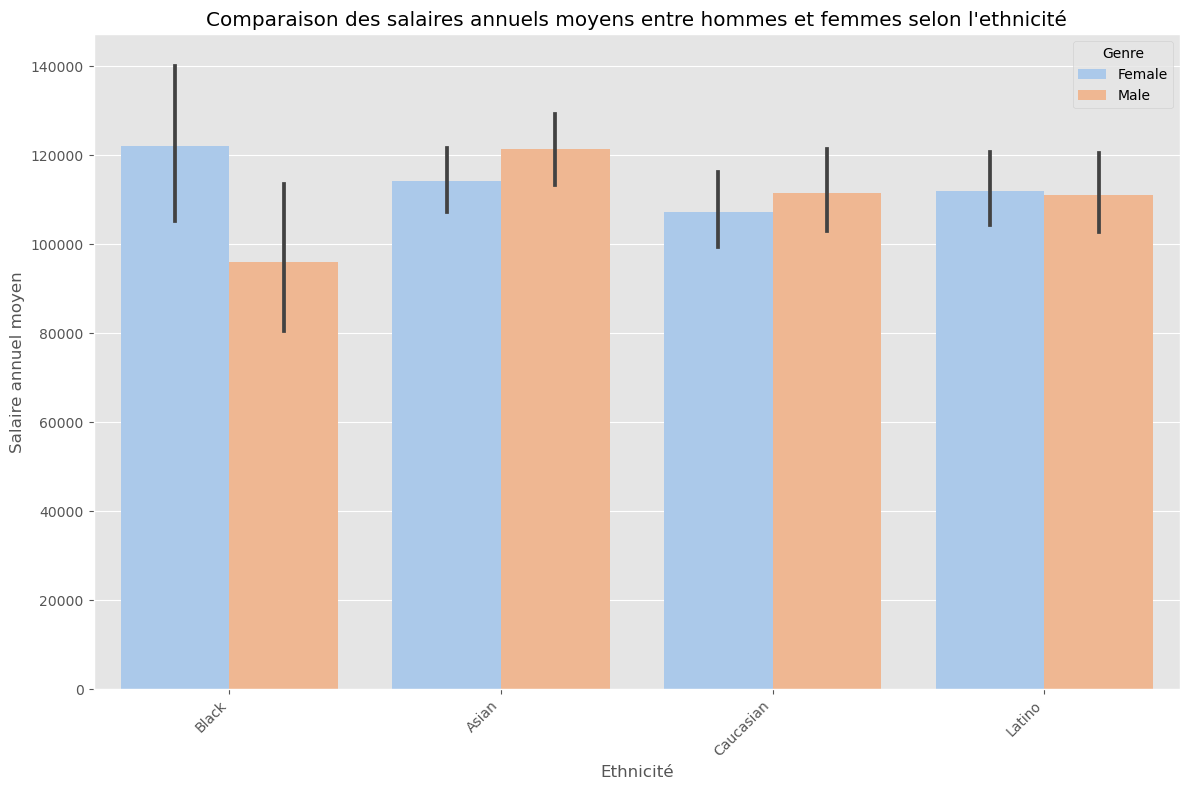

In [71]:
# Comparaison des salaires moyens entre hommes et femmes selon l'ethnicité
plt.figure(figsize=(12, 8))
sns.barplot(x='Ethnicity', y='Annual Salary', hue='Gender', data=df, estimator='mean', palette='pastel')
plt.title('Comparaison des salaires annuels moyens entre hommes et femmes selon l\'ethnicité')
plt.xlabel('Ethnicité')
plt.ylabel('Salaire annuel moyen')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


D’après le graphique, on peut faire les déductions suivantes :

Différences de salaire entre les genres : Il semble y avoir des différences dans les salaires annuels moyens entre les hommes et les femmes pour les différents groupes ethniques. Cela pourrait indiquer une disparité salariale entre les genres dans ces groupes.

Variabilité des salaires : Les salaires varient également en fonction de l’ethnicité. Certains groupes ethniques ont des salaires moyens plus élevés que d’autres, indépendamment du genre.

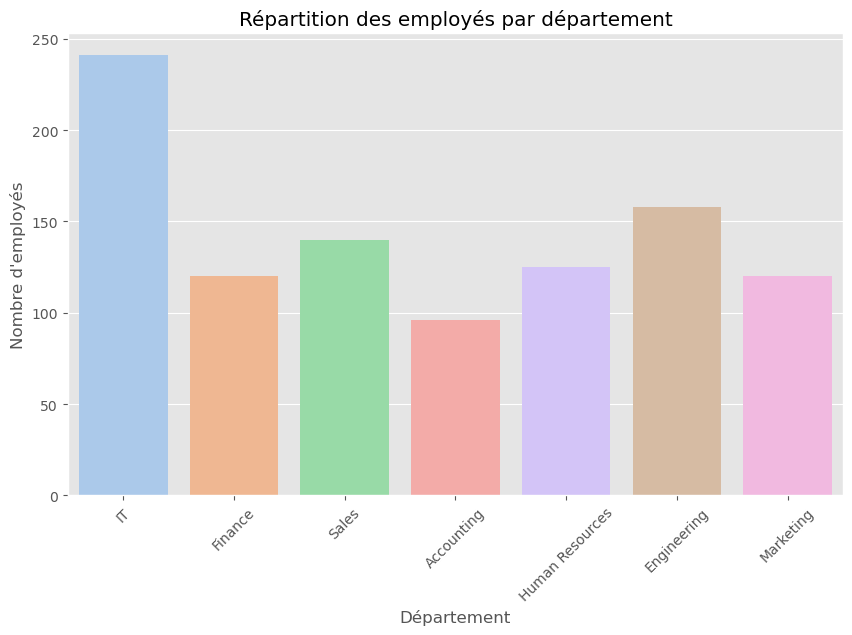

In [93]:
#Répartition des employés par département :
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=df, palette='pastel')
plt.title('Répartition des employés par département')
plt.xlabel('Département')
plt.ylabel('Nombre d\'employés')
plt.xticks(rotation=45)
plt.show()


D’après le graphique, on peut faire les déductions suivantes :

IT : Le département IT a le plus grand nombre d’employés avec plus de 200. Cela pourrait indiquer que l’entreprise est fortement axée sur la technologie.

Engineering : Le département Engineering est le deuxième plus grand département avec un peu moins de 200 employés. Cela pourrait indiquer que l’entreprise est également axée sur le développement de produits ou de services.

Sales et Human Resources : Les départements Sales et Human Resources ont entre 100 et 150 employés. Cela pourrait indiquer que ces fonctions sont également importantes pour l’entreprise.

Finance, Accounting et Marketing : Les départements Finance, Accounting et Marketing ont chacun moins de 100 employés. Cela pourrait indiquer que ces fonctions sont moins centrales dans l’entreprise ou qu’elles sont externalisées.

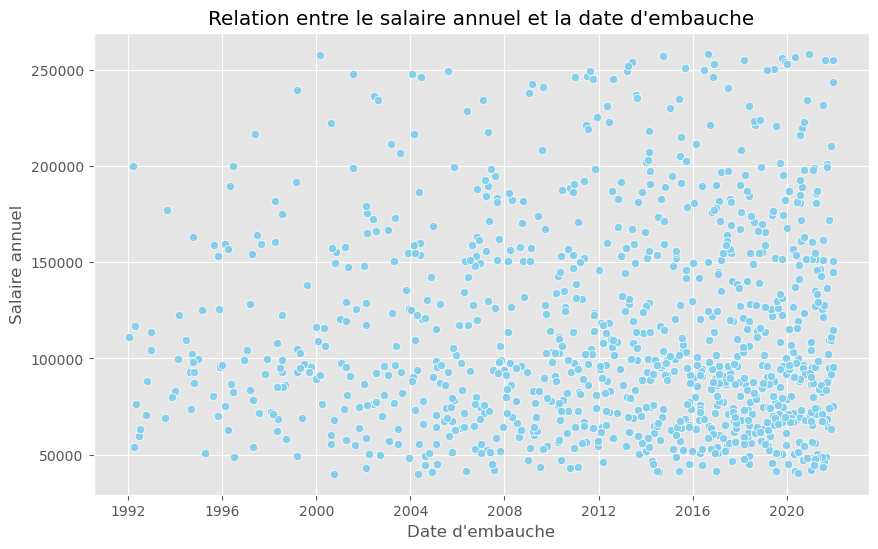

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hire Date', y='Annual Salary', data=df, color='skyblue')
plt.title('Relation entre le salaire annuel et la date d\'embauche')
plt.xlabel('Date d\'embauche')
plt.ylabel('Salaire annuel')
plt.show()


D’après le graphique, on peut faire les déductions suivantes :

Tendance générale : On peut observer une tendance générale où la concentration de points augmente vers le côté droit du graphique, indiquant une augmentation des salaires annuels au fil des années. Cela pourrait suggérer que les salaires ont généralement augmenté au fil du temps dans cette organisation.

Variabilité des salaires : Il y a une grande variabilité des salaires à chaque date d’embauche, comme le montrent les nombreux points à différentes hauteurs pour chaque année. Cela pourrait indiquer une grande diversité de rôles et de niveaux de rémunération au sein de l’organisation.